In [63]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
gait = pd.read_csv("gaitFull.csv")

In [80]:
gait

,P1,P2,P3,P4,x1,y1,z1,x2,y2,z2,r,label
0,0,0,1,1,-0.29,-9.70,3.97,0.08,-9.31,0.27,161,1
1,0,0,1,1,0.05,-9.51,4.45,0.27,-9.05,-0.67,151,1
2,0,0,1,1,0.78,-9.48,6.54,1.96,-8.99,2.08,146,2
3,0,0,1,1,5.77,-6.85,3.06,-0.24,-8.95,6.86,144,2
4,0,0,1,1,0.45,-9.52,-0.36,0.39,-9.85,2.25,143,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,1,1,0,0,-5.31,-10.97,-6.63,-1.89,-10.10,-3.29,288,4
2372,1,1,0,0,-0.86,-9.70,-1.71,-3.69,-9.92,-2.17,276,4
2373,1,1,0,0,-0.79,-10.07,-3.23,-1.73,-9.16,1.32,251,4
2374,1,1,0,0,0.31,-10.10,3.14,3.06,-8.72,-0.20,209,4


In [81]:
X1 = gait.drop('label',  axis=1)
y = gait['label']

In [82]:
#'P1','P2','P3','x1','y1','z1','x2','y2','z2'
X = pd.DataFrame(X1 , columns= ['P1','P2','P3','r'])
Xa1 = pd.DataFrame(X1 , columns= ['x1','y1','z1'])
Xb1 = pd.DataFrame(X1 , columns= ['x2','y2','z2'])

In [83]:
X

,P1,P2,P3,r
0,0,0,1,161
1,0,0,1,151
2,0,0,1,146
3,0,0,1,144
4,0,0,1,143
...,...,...,...,...
2371,1,1,0,288
2372,1,1,0,276
2373,1,1,0,251
2374,1,1,0,209


In [84]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
Xa1 = sc.fit_transform(Xa1) 
Xb1 = sc.transform(Xb1) 

from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 1) 
  
Xa1 = pca.fit_transform(Xa1)   
explained_variance = pca.explained_variance_ratio_ 

In [85]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 1) 
  
Xb1 = pca.fit_transform(Xb1)   
explained_variance = pca.explained_variance_ratio_ 

In [86]:
X_train

,P1,P2,P3,Xa1,Xb1,r
851,1,1,0,0.253416,0.828877,238
787,0,0,1,-0.955152,0.583650,141
1268,0,0,1,0.378207,-0.179093,153
802,1,1,0,-0.332213,-0.075202,329
979,1,1,0,-0.299730,-0.630152,321
...,...,...,...,...,...,...
1863,1,1,0,-1.374541,0.640051,279
1330,0,1,1,0.040636,0.826716,127
2213,1,1,0,-0.250413,0.250108,167
2055,1,0,1,4.065130,0.212795,128


In [87]:
X.insert(3, "Xa1", Xa1, True) 
X.insert(4, "Xb1", Xb1, True) 

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=40)

In [89]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [1000],  
              'gamma': [ 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.667, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.670, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.646, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1000], 'gamma': [0.0001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [90]:
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [91]:
grid_predictions=grid.predict(X_test)
pred1=grid_predictions

In [92]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           1       0.66      0.51      0.58        88
           2       0.68      0.65      0.66       166
           3       0.77      0.61      0.68        66
           4       0.59      0.75      0.66       156

    accuracy                           0.65       476
   macro avg       0.68      0.63      0.65       476
weighted avg       0.66      0.65      0.65       476



In [93]:
print(confusion_matrix(y_test, grid_predictions))

[[ 45  17   0  26]
 [  7 108   9  42]
 [  2  12  40  12]
 [ 14  22   3 117]]


In [55]:
d=confusion_matrix(y_test, grid_predictions)

In [56]:
from sklearn.model_selection import GridSearchCV 
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [57]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 

In [58]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)
grid = GridSearchCV(knn, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.352, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.357, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.322, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.352, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.349, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... 

/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... n_neighbors=11, score=0.439, total=   0.0s
[CV] n_neighbors=11 ..................................................
[CV] ...................... n_neighbors=11, score=0.382, total=   0.0s
[CV] n_neighbors=11 ..................................................
[CV] ...................... n_neighbors=11, score=0.368, total=   0.0s
[CV] n_neighbors=12 ..................................................
[CV] ...................... n_neighbors=12, score=0.426, total=   0.0s
[CV] n_neighbors=12 ..................................................
[CV] ...................... n_neighbors=12, score=0.374, total=   0.0s
[CV] n_neighbors=12 ..................................................
[CV] ...................... n_neighbors=12, score=0.377, total=   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ...................... n_neighbors=13, score=0.439, total=   0.0s
[CV] n_neighbors=13 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=7, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [59]:
knn_predictions=knn.predict(X_test)
pred2=knn_predictions=knn.predict(X_test)

In [60]:
print(classification_report(y_test, knn_predictions)) 

              precision    recall  f1-score   support

           0       0.38      0.43      0.40        88
           1       0.35      0.35      0.35        51
           2       0.45      0.43      0.44        61
           3       0.26      0.26      0.26        54
           4       0.62      0.62      0.62        66
           5       0.21      0.33      0.26        33
           6       0.41      0.40      0.40        70
           7       0.36      0.17      0.23        53

    accuracy                           0.39       476
   macro avg       0.38      0.37      0.37       476
weighted avg       0.40      0.39      0.39       476



In [101]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 

In [102]:
pred3=gnb_predictions
print(classification_report(y_test, gnb_predictions)) 

              precision    recall  f1-score   support

           1       0.25      0.68      0.37        63
           2       0.60      0.22      0.32       186
           3       0.28      0.73      0.41        60
           4       0.71      0.35      0.47       167

    accuracy                           0.39       476
   macro avg       0.46      0.50      0.39       476
weighted avg       0.55      0.39      0.39       476



In [103]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, mean([pred1[i], pred2[i],pred3[1]]))

In [104]:
print(classification_report(y_test,final_pred)) 

              precision    recall  f1-score   support

           1       0.57      0.33      0.42        63
           2       0.66      0.74      0.69       186
           3       0.17      0.65      0.27        60
           4       0.00      0.00      0.00       167

    accuracy                           0.41       476
   macro avg       0.35      0.43      0.35       476
weighted avg       0.35      0.41      0.36       476



/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
print(confusion_matrix(y_test, final_pred))

[[ 21  27  15   0]
 [  6 137  43   0]
 [  2  19  39   0]
 [  8  26 133   0]]


In [94]:
gait = pd.read_csv("gaitFullModified2.csv")

In [95]:
X = gait.drop('label',  axis=1)
y = gait['label']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=40)

In [97]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [1000],  
              'gamma': [0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.669, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.667, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.639, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1000], 'gamma': [0.0001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

print(grid.best_estimator_) 

In [98]:
grid_predictions=grid.predict(X_test)

In [99]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           1       0.64      0.48      0.55        88
           2       0.69      0.72      0.70       166
           3       0.75      0.59      0.66        66
           4       0.62      0.74      0.68       156

    accuracy                           0.66       476
   macro avg       0.68      0.63      0.65       476
weighted avg       0.67      0.66      0.66       476



In [35]:
print(confusion_matrix(y_test, grid_predictions))

[[ 27  15   0  12]
 [ 14 142   4  26]
 [  7  14  38   9]
 [ 14  27  12 115]]


In [55]:
d=[[ 27 ,15  , 0  ,12],
 [ 14 ,142 ,  4,  26],
 [  7,  14,  38  , 9],
 [ 14 , 27,  12, 115]]

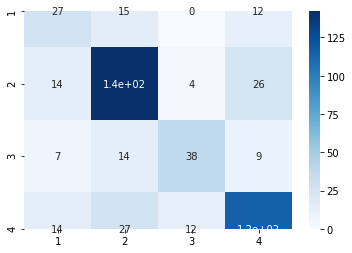

In [57]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "1234"],
              columns = [i for i in "1234"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

In [64]:
nodes= [3,8,6,7,2]
out=[]
for k in range(len(nodes)):
        out.append(nodes[-k])
print(out)

[3, 2, 7, 6, 8]


In [66]:
num = 15
def increment(num):
    num = num + 2

increment(10)
print(num)

15
